In [29]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

######################################## DIVERSITY SCORE #############################################################

filepath = '/Users/justineleaclement/Documents/Projets /Australia_SubProjet/merged_inner_df.csv'
merged_df = pd.read_csv(filepath)
merged_df = merged_df.drop('__url_x', axis=1)

merged_df.head()

,suburb_name,_google_import_B,suburb_population,suburb_median_age,suburb_number_of_families,suburb_number_of_private_dwellings,suburb_number_of_people_per_household,suburb_financial_median_monthly_mortgage_repayments,suburb_financial_median_weekly_household_income,suburb_transport_average_car_per_dwelling,...,violent_crimes_per_1000_people,percentage_suburbs_with_less_violet_crimes,percentage_suburbs_with_less_property_crimes,top_crime_types,changes_of_being_a_victim_of_a_violent_crime_in_suburb,chances_of_being_a_victim_of_violent_crime_in_state,chances_of_being_a_violent_victim_in_australia,chances_of_being_a_property_victim_in_suburb,chances_of_being_a_property_victim_in_state,chances_of_being_a_property_victim_in_australia
0,Adaminaby,https://abs.gov.au/census/find-census-data/qui...,339,52.0,74,224,2.0,"$1,083",$954,2.2,...,14.75,88.05%,53.67%,Top crime types: Justice procedures offences I...,1 in 68,1 in 97,1 in 105,1 in 85,1 in 44,1 in 31
1,Albury,https://abs.gov.au/census/find-census-data/qui...,"4,955",45.0,"1,236","2,630",2.0,"$1,733","$1,601",1.5,...,63.98,98.03%,97.47%,Top crime types: Theft In 2022 in Albury there...,1 in 16,1 in 97,1 in 105,1 in 6,1 in 44,1 in 31
2,Alectown,https://abs.gov.au/census/find-census-data/qui...,151,49.0,43,67,2.4,"$1,257","$1,803",2.2,...,19.87,91.63%,67.51%,Top crime types: Assault and related offences ...,1 in 50,1 in 97,1 in 105,1 in 50,1 in 44,1 in 31
3,Alpine,https://abs.gov.au/census/find-census-data/qui...,141,49.0,42,61,2.8,"$3,033","$2,291",3.3,...,0.00,0%,69.5%,Top crime types: Theft In 2022 in Alpine there...,1 in INF,1 in 97,1 in 105,1 in 47,1 in 44,1 in 31
4,Argoon,https://abs.gov.au/census/find-census-data/qui...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0%,0%,Top crime types:,1 in INF,1 in 97,1 in 105,1 in INF,1 in 44,1 in 31


In [42]:
##################################################  DIVERSITY SCORE #######################################
# ################
# ####################
# ######################## 1: Language diversity

columns = [
    'suburb_language_top_other_1',
    'suburb_language_top_other_2',
    'suburb_language_top_other_3',
    'suburb_language_top_other_4',
    'suburb_language_top_other_5'

]

# Missing values in the specified columns before replacement
print("Before manipulation - Missing values:")
print(merged_df[
    ['suburb_language_top_other_1', 
     'suburb_language_top_other_2', 
     'suburb_language_top_other_3', 
     'suburb_language_top_other_4', 
     'suburb_language_top_other_5']
].isnull().sum())

Before manipulation - Missing values:
suburb_language_top_other_1       0
suburb_language_top_other_2       0
suburb_language_top_other_3       0
suburb_language_top_other_4    1394
suburb_language_top_other_5    1394
dtype: int64


In [30]:
"""From the above data set, values looked like this;

Punjabi 59 1.2 53,460 0.7 239,033 0.9   

We need to extract the information we want to keep, in this case the first word and the first number

For the Language and the percentage of that language used in subrub

To be able to manipulate the missing values as well"""

'From the above data set, values looked like this;\n\nPunjabi 59 1.2 53,460 0.7 239,033 0.9   \n\nWe need to extract the information we want to keep, in this case the first word and the first number\n\nFor the Language and the percentage of that language used in subrub\n\nTo be able to manipulate the missing values as well'

In [43]:
#EXTRACTING THE FIRST WORD; LANGUAGE 

# Function to extract only words from a string
def extract_only_words(cell_value):
    if isinstance(cell_value, str):
        # Use regex to find all words (sequences of alphabetical characters)
        words = re.findall(r'\b[A-Za-z]+\b', cell_value)
        if words: 
            return words
        else:  
            return None  #This allows Nans to be identified as so 
    return None

# Applying the function to each cell in the specified columns
merged_df['language_1'] = merged_df['suburb_language_top_other_1'].apply(extract_only_words)
merged_df['language_2'] = merged_df['suburb_language_top_other_2'].apply(extract_only_words)
merged_df['language_3'] = merged_df['suburb_language_top_other_3'].apply(extract_only_words)
merged_df['language_4'] = merged_df['suburb_language_top_other_4'].apply(extract_only_words)
merged_df['language_5'] = merged_df['suburb_language_top_other_5'].apply(extract_only_words)

# Count missing values in the specified language columns
missing_values_language = merged_df[['language_1', 'language_2', 'language_3', 'language_4', 'language_5']].isnull().sum()

print("Missing values in language columns:")
print(missing_values_language)

print(merged_df['language_1'])

Missing values in language columns:
language_1       0
language_2       0
language_3       0
language_4    1394
language_5    1394
dtype: int64
0               [Spanish]
1               [Punjabi]
2             [Afrikaans]
3            [Indonesian]
8            [Portuguese]
               ...       
15314            [Nepali]
15315             [Kriol]
15316    [Murrinh, Patha]
15317         [Kunwinjku]
15318             [Greek]
Name: language_1, Length: 8597, dtype: object


In [44]:
#EXTRACTING THE PERCENTAGE; NUMBER USING THAT LANGUAGE 

   # # Extracting the percentage as a string based on the position in the split list
merged_df['percentage_1'] = merged_df['suburb_language_top_other_1'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
    # # Extract culture and percentage from 'suburb_cultural_diversity_top1'
  # # Extracting the percentage as a string based on the position in the split list
merged_df['percentage_2'] = merged_df['suburb_language_top_other_2'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
  # # Extracting the percentage as a string based on the position in the split list
merged_df['percentage_3'] = merged_df['suburb_language_top_other_3'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
  # # Extracting the percentage as a string based on the position in the split list
merged_df['percentage_4'] = merged_df['suburb_language_top_other_4'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
     # # Extracting the percentage as a string based on the position in the split list
merged_df['percentage_5'] = merged_df['suburb_language_top_other_5'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)

# Display the contents of the newly created columns
print(merged_df[['language_1', 'percentage_1', 'language_2', 'percentage_2', 'language_3', 'percentage_3', 'language_4', 'percentage_4', 'language_5', 'percentage_5']].head())

     language_1 percentage_1                                  language_2  \
0     [Spanish]          0.9  [null, null, null, null, null, null, null]   
1     [Punjabi]          1.2                                     [Greek]   
2   [Afrikaans]          2.0  [null, null, null, null, null, null, null]   
3  [Indonesian]          3.5                                    [Polish]   
8  [Portuguese]          4.1  [null, null, null, null, null, null, null]   

  percentage_2                                  language_3 percentage_3  \
0         null             [English, only, used, at, home]         82.0   
1          0.9                                  [Mandarin]          0.6   
2         null             [English, only, used, at, home]         94.0   
3          2.1  [null, null, null, null, null, null, null]         null   
8         null             [English, only, used, at, home]         71.3   

                                   language_4 percentage_4  \
0  [null, null, null, null, nu

In [45]:
#Need to change [null, null, null, null, null, null, null]  to Nans 


columns_to_replace = ['language_2', 'language_3', 'language_4', 'language_5']
merged_df[columns_to_replace] = merged_df[columns_to_replace].applymap(lambda x: np.nan if x == ['null', 'null', 'null', 'null', 'null', 'null', 'null'] else x)


print(merged_df[['language_1', 'percentage_1', 'language_2', 'percentage_2', 'language_3', 'percentage_3', 'language_4', 'percentage_4', 'language_5', 'percentage_5']].head())

     language_1 percentage_1 language_2 percentage_2  \
0     [Spanish]          0.9        NaN         null   
1     [Punjabi]          1.2    [Greek]          0.9   
2   [Afrikaans]          2.0        NaN         null   
3  [Indonesian]          3.5   [Polish]          2.1   
8  [Portuguese]          4.1        NaN         null   

                        language_3 percentage_3  \
0  [English, only, used, at, home]         82.0   
1                       [Mandarin]          0.6   
2  [English, only, used, at, home]         94.0   
3                              NaN         null   
8  [English, only, used, at, home]         71.3   

                        language_4 percentage_4  \
0                              NaN         null   
1                         [German]          0.6   
2                              NaN         null   
3  [English, only, used, at, home]         93.6   
8                              NaN         null   

                                          languag

In [46]:
# Verify that NaN values have been replaced with mean values
print("Before replacing NaN with mean values:")
print(merged_df[['percentage_1', 'percentage_2', 'percentage_3', 'percentage_4', 'percentage_5']].isnull().sum())

# Converting the columns to numeric 
percentage_columns = ['percentage_1','percentage_2', 'percentage_3', 'percentage_4', 'percentage_5']
for col in percentage_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Calculate the mean values for 'percentage_1', 'percentage_2', 'percentage_3', 'percentage_4', and 'percentage_5' excluding NaN
mean_percentage_1 = merged_df['percentage_1'].replace({None: np.nan}).astype(float).mean()
mean_percentage_2 = merged_df['percentage_2'].replace({None: np.nan}).astype(float).mean()
mean_percentage_3 = merged_df['percentage_3'].replace({None: np.nan}).astype(float).mean()
mean_percentage_4 = merged_df['percentage_4'].replace({None: np.nan}).astype(float).mean()
mean_percentage_5 = merged_df['percentage_5'].replace({None: np.nan}).astype(float).mean()

# Replace NaN values in 'percentage_1', 'percentage_2', 'percentage_3', 'percentage_4', and 'percentage_5' with their respective mean values
merged_df['percentage_1'].fillna(mean_percentage_1, inplace=True)
merged_df['percentage_2'].fillna(mean_percentage_2, inplace=True)
merged_df['percentage_3'].fillna(mean_percentage_3, inplace=True)
merged_df['percentage_4'].fillna(mean_percentage_4, inplace=True)
merged_df['percentage_5'].fillna(mean_percentage_5, inplace=True)

# Verify that NaN values have been replaced with mean values
print("After replacing NaN with mean values:")
print(merged_df[['percentage_1', 'percentage_2', 'percentage_3', 'percentage_4', 'percentage_5']].isnull().sum())

# Function to calculate diversity score for a row
def calculate_diversity(row):
    # Extract culture and percentage columns
    cultures = [row[f'language_{i}'] for i in range(1, 6) if isinstance(row[f'language_{i}'], str)]
    percentages = [row[f'percentage_{i}'] for i in range(1, 6) if not np.isnan(row[f'percentage_{i}'])]

    # Convert percentages to fractions
    fractions = [percent / 100 for percent in percentages]

    # Calculate diversity score for the row
    lang_diversity_score = -sum(fraction * np.log(fraction) for fraction in fractions)
    return lang_diversity_score

# Calculate diversity scores for each row
merged_df['Lang_Diversity_Score'] = merged_df.apply(calculate_diversity, axis=1)

# Calculate average diversity score for the dataset
average_lang_diversity_score = merged_df['Lang_Diversity_Score'].mean()

print("Language Diversity Scores for Each Row:")
print(merged_df['Lang_Diversity_Score'])
print("\nAverage Language Diversity Score:", average_lang_diversity_score)

Before replacing NaN with mean values:
percentage_1       0
percentage_2       0
percentage_3       0
percentage_4    1394
percentage_5    1394
dtype: int64
After replacing NaN with mean values:
percentage_1    0
percentage_2    0
percentage_3    0
percentage_4    0
percentage_5    0
dtype: int64
Language Diversity Scores for Each Row:
0        0.708027
1        0.183352
2        0.618483
3        0.734228
8        0.946032
           ...   
15314    0.561982
15315    0.773820
15316    0.381873
15317    1.386593
15318    0.223651
Name: Lang_Diversity_Score, Length: 8597, dtype: float64

Average Language Diversity Score: 0.4444772994937527


/var/folders/x6/9hl3v1nd3nd16bmyb79ls1wm0000gn/T/ipykernel_4939/1386133651.py:38: RuntimeWarning: divide by zero encountered in log
  lang_diversity_score = -sum(fraction * np.log(fraction) for fraction in fractions)
/var/folders/x6/9hl3v1nd3nd16bmyb79ls1wm0000gn/T/ipykernel_4939/1386133651.py:38: RuntimeWarning: invalid value encountered in scalar multiply
  lang_diversity_score = -sum(fraction * np.log(fraction) for fraction in fractions)


In [47]:
##################################################  DIVERSITY SCORE #######################################
# ################
# ####################
# ######################## 2: Religion diversity

# Function to extract only words from a string
def extract_only_words(cell_value):
    if isinstance(cell_value, str):
        words = re.findall(r'\b[A-Za-z]+\b', cell_value)
        if words:  
            return words
        else:  # If no words were found, return None
            return None
    return None

# Extracting words for religion diversity columns
religion_1 = merged_df['suburb_religion_top1'].apply(extract_only_words)
religion_2 = merged_df['suburb_religion_top2'].apply(extract_only_words)
religion_3 = merged_df['suburb_religion_top3'].apply(extract_only_words)

# Creating new columns with extracted words
merged_df['religion_1'] = religion_1
merged_df['religion_2'] = religion_2
merged_df['religion_3'] = religion_3

# Extracting the percentage as a string based on the position in the split list
merged_df['rel_percentage_1'] = merged_df['suburb_religion_top1'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
merged_df['rel_percentage_2'] = merged_df['suburb_religion_top2'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
merged_df['rel_percentage_3'] = merged_df['suburb_religion_top3'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)

# Displaying the contents of religion words columns
print(merged_df[['religion_1', 'religion_2', 'religion_3']].head())
print(merged_df[['rel_percentage_1', 'rel_percentage_2', 'rel_percentage_3']].head())

# Check for missing values in the specified columns
missing_values = merged_df[['religion_1', 'religion_2', 'religion_3', 'rel_percentage_1', 'rel_percentage_2','rel_percentage_3' ]].isnull().sum()
print("\nNumber of missing values in each column before manipulation:")
print(missing_values)


# Calculate the mean values for 'rel_percentage_1', 'rel_percentage_2', and 'rel_percentage_3' excluding NaN
mean_rel_percentage_1 = merged_df['rel_percentage_1'].replace({None: np.nan}).astype(float).mean()
mean_rel_percentage_2 = merged_df['rel_percentage_2'].replace({None: np.nan}).astype(float).mean()
mean_rel_percentage_3 = merged_df['rel_percentage_3'].replace({None: np.nan}).astype(float).mean()

# Replace NaN values in 'rel_percentage_1', 'rel_percentage_2', and 'rel_percentage_3' with their respective mean values
merged_df['rel_percentage_1'].fillna(mean_rel_percentage_1, inplace=True)
merged_df['rel_percentage_2'].fillna(mean_rel_percentage_2, inplace=True)
merged_df['rel_percentage_3'].fillna(mean_rel_percentage_3, inplace=True)

# Verify that NaN values have been replaced with mean values
print("After replacing NaN with mean values:")
print(merged_df[['rel_percentage_1', 'rel_percentage_2', 'rel_percentage_3']].isnull().sum())

# Converting the percentages columns to numeric values
religion_percentage_columns = [f'percentage_{i}' for i in range(1, 4)]
for col in religion_percentage_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
    
# Function to calculate diversity score for a row
def calculate_diversity(row):
    # Extract culture and percentage columns
    cultures = [row[f'religion_{i}'] for i in range(1, 4) if isinstance(row[f'religion_{i}'], str)]
    percentages = [row[f'percentage_{i}'] for i in range(1, 4) if not np.isnan(row[f'percentage_{i}'])]

    # Convert percentages to fractions
    fractions = [percent / 100 for percent in percentages]

    # Calculate diversity score for the row
    rel_diversity_score = -sum(fraction * np.log(fraction) for fraction in fractions)
    return rel_diversity_score

# Calculate diversity scores for each row
merged_df['Rel_Diversity_Score'] = merged_df.apply(calculate_diversity, axis=1)

# Calculate average diversity score for the dataset
average_rel_diversity_score = merged_df['Rel_Diversity_Score'].mean()

print("Religion Diversity Scores for Each Row:")
print(merged_df['Rel_Diversity_Score'])
print("\nAverage Religion Diversity Score:", average_rel_diversity_score)

                      religion_1        religion_2  religion_3
0  [No, Religion, so, described]        [Catholic]  [Anglican]
1  [No, Religion, so, described]        [Catholic]  [Anglican]
2                     [Catholic]  [Christian, nfd]  [Anglican]
3  [No, Religion, so, described]        [Catholic]  [Anglican]
8  [No, Religion, so, described]     [Not, stated]  [Anglican]
  rel_percentage_1 rel_percentage_2 rel_percentage_3
0             32.2             26.0             16.2
1             40.4             23.1             12.8
2             16.6             15.9             14.6
3             34.8             28.4             15.6
8             51.6             21.3              6.6

Number of missing values in each column before manipulation:
religion_1          0
religion_2          0
religion_3          1
rel_percentage_1    0
rel_percentage_2    0
rel_percentage_3    1
dtype: int64
After replacing NaN with mean values:
rel_percentage_1    0
rel_percentage_2    0
rel_percentage_

/var/folders/x6/9hl3v1nd3nd16bmyb79ls1wm0000gn/T/ipykernel_4939/852323398.py:70: RuntimeWarning: divide by zero encountered in log
  rel_diversity_score = -sum(fraction * np.log(fraction) for fraction in fractions)
/var/folders/x6/9hl3v1nd3nd16bmyb79ls1wm0000gn/T/ipykernel_4939/852323398.py:70: RuntimeWarning: invalid value encountered in scalar multiply
  rel_diversity_score = -sum(fraction * np.log(fraction) for fraction in fractions)


In [48]:
##################################################  DIVERSITY SCORE #######################################
# ################
# ####################
# ######################## 3: Cultural diversity:

# Extract culture and percentage from following columns
columns = [
    'suburb_cultural_diversity_top1',
    'suburb_cultural_diversity_top2',
    'suburb_cultural_diversity_top3',
    'suburb_cultural_diversity_top4',
    'suburb_cultural_diversity_top5'
]

#ONE
    # # Extract culture and percentage from 'suburb_cultural_diversity_top1'
merged_df['culture_1'] = merged_df['suburb_cultural_diversity_top1'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
    # # Extracting the percentage as a string based on the position in the split list
merged_df['percentage_1'] = merged_df['suburb_cultural_diversity_top1'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
    # # Extract culture and percentage from 'suburb_cultural_diversity_top1'
#TWO 
merged_df['culture_2'] = merged_df['suburb_cultural_diversity_top2'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
    # # Extracting the percentage as a string based on the position in the split list
merged_df['percentage_2'] = merged_df['suburb_cultural_diversity_top2'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
#THREE
    # # Extract culture and percentage from 'suburb_cultural_diversity_top1'
merged_df['culture_3'] = merged_df['suburb_cultural_diversity_top4'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
    # # Extracting the percentage as a string based on the position in the split list
merged_df['percentage_3'] = merged_df['suburb_cultural_diversity_top4'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
#FOUR 
    # # Extract culture and percentage from 'suburb_cultural_diversity_top1'
merged_df['culture_4'] = merged_df['suburb_cultural_diversity_top4'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
    # # Extracting the percentage as a string based on the position in the split list
merged_df['percentage_4'] = merged_df['suburb_cultural_diversity_top4'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
#FIVE
    # # Extract culture and percentage from 'suburb_cultural_diversity_top1'
merged_df['culture_5'] = merged_df['suburb_cultural_diversity_top5'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
    # # Extracting the percentage as a string based on the position in the split list
merged_df['percentage_5'] = merged_df['suburb_cultural_diversity_top5'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)
#suburb_cultural_diversity_top1: Australian Aboriginal 1,658 86.2 57,086 24.5 741,307 2.9

# Display the contents of the newly created columns
print(merged_df[['culture_1', 'percentage_1', 'culture_2', 'percentage_2', 'culture_3', 'percentage_3', 'culture_4', 'percentage_4', 'culture_5', 'percentage_5']].head())


# Extract culture and percentage from the specified columns
columns = [
    'suburb_cultural_diversity_top1',
    'suburb_cultural_diversity_top2',
    'suburb_cultural_diversity_top3',
    'suburb_cultural_diversity_top4',
    'suburb_cultural_diversity_top5'
]

# Extract culture and percentage from each column and create new columns
for i in range(1, 6):
    # Extract culture
    merged_df[f'culture_{i}'] = merged_df[f'suburb_cultural_diversity_top{i}'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)
    # Extract percentage
    merged_df[f'percentage_{i}'] = merged_df[f'suburb_cultural_diversity_top{i}'].apply(lambda x: x.split()[-5] if isinstance(x, str) else None)

# Replace missing values or zeros in percentage columns with mean values
for i in range(1, 6):
    col = f'percentage_{i}'
    mean_percentage = merged_df[col].replace({None: np.nan}).astype(float).mean()
    merged_df[col].fillna(mean_percentage, inplace=True)


# Verify that NaN values have been replaced with mean values
print("Before replacing NaN with mean values:")
print(merged_df[['percentage_1', 'percentage_2', 'percentage_3', 'percentage_4', 'percentage_5']].isnull().sum())


# Check for missing values in the percentage columns
missing_values = merged_df[[f'percentage_{i}' for i in range(1, 6)]].isnull().sum()
print("\nNumber of missing values in each percentage column:")
print(missing_values)

# Function to calculate diversity score for a row
def calculate_diversity(row):
    # Extract culture and percentage columns
    cultures = [row[f'culture_{i}'] for i in range(1, 6) if isinstance(row[f'culture_{i}'], str)]
    percentages = [row[f'percentage_{i}'] for i in range(1, 6) if isinstance(row[f'percentage_{i}'], str)]

    # Convert percentages to fractions
    fractions = []
    for percent in percentages:
        try:
            percent_float = float(percent.replace(',', '.')) if ',' in percent else float(percent)
            fractions.append(percent_float / 100)
        except (ValueError, TypeError):
            pass

    # Calculate diversity score for the row
    if fractions:
        cul_diversity_score = -sum(fraction * np.log(fraction) for fraction in fractions)
        return cul_diversity_score
    else:
        return np.nan
    
# Calculate diversity scores for each row
merged_df['Cul_Diversity_Score'] = merged_df.apply(calculate_diversity, axis=1)

# Drop rows with NaN in 'Cul_Diversity_Score' column
merged_df.dropna(subset=['Cul_Diversity_Score'], inplace=True)

# Calculate average diversity score for the dataset
average_cul_diversity_score = merged_df['Cul_Diversity_Score'].mean()

print("Culture Diversity Scores for Each Row:")
print(merged_df['Cul_Diversity_Score'])
print("\nAverage Culture Diversity Score:", average_cul_diversity_score)

  culture_1 percentage_1   culture_2 percentage_2 culture_3 percentage_3  \
0   English         41.0  Australian         30.7  Scottish         10.9   
1   English         42.9  Australian         33.8  Scottish         14.0   
2   English         47.0  Australian         45.0    German          9.9   
3   English         46.1  Australian         38.3     Irish         16.3   
8   English         29.5  Australian         20.5    German          9.8   

  culture_4 percentage_4 culture_5 percentage_5  
0  Scottish         10.9    German          4.1  
1  Scottish         14.0    German          7.9  
2    German          9.9  Scottish          5.3  
3     Irish         16.3    German          7.8  
8    German          9.8  Scottish          7.4  
Before replacing NaN with mean values:
percentage_1    0
percentage_2    0
percentage_3    0
percentage_4    0
percentage_5    0
dtype: int64

Number of missing values in each percentage column:
percentage_1    0
percentage_2    0
percentage_3

In [51]:
#DIVERSITY SCORE 
# ################
# ####################
# ########################  #OVERALL:


# Calculate the average diversity score
merged_df['Mapped_Diversity_Score'] = (merged_df['Rel_Diversity_Score'] + merged_df['Cul_Diversity_Score'] + merged_df['Lang_Diversity_Score']) / 3

# Calculate the mean of non-NaN values in 'Mapped_Diversity_Score_1_to_10'
mean_mapped_score = merged_df['Mapped_Diversity_Score'].mean()

# Replace NaN values with the mean of non-NaN values
merged_df['Mapped_Diversity_Score'].fillna(mean_mapped_score, inplace=True)

# Calculate percentile rank, handling non-finite values by replacing them with a large number
merged_df['Percentile'] = merged_df['Mapped_Diversity_Score'].replace([np.inf, -np.inf, np.nan], np.nanmax(merged_df['Mapped_Diversity_Score']) * 2).rank(pct=True) * 100


# Map percentile rank to a scale from 1 to 10
merged_df['Mapped_Diversity_Score_1_to_10'] = np.ceil(merged_df['Percentile'] / 10).astype(int)

# Display or use the new 'Mapped_Diversity_Score_1_to_10' column
print(merged_df[['Mapped_Diversity_Score', 'Mapped_Diversity_Score_1_to_10']])
print(merged_df['Mapped_Diversity_Score_1_to_10'].value_counts())

# Replace NaN values in 'Mapped_Diversity_Score_1_to_10' column with 0
merged_df['Mapped_Diversity_Score_1_to_10'].fillna(0, inplace=True)

# Display or use the updated 'Mapped_Diversity_Score_1_to_10' column
print(merged_df['Mapped_Diversity_Score_1_to_10'])

       Mapped_Diversity_Score  Mapped_Diversity_Score_1_to_10
0                    0.801202                               9
1                    0.606172                               4
2                    0.719873                               7
3                    0.909811                              10
8                    0.924911                              10
...                       ...                             ...
15314                0.731450                               7
15315                0.494254                               1
15316                0.424181                               1
15317                0.862079                              10
15318                0.618191                               4

[8597 rows x 2 columns]
6     1230
9      860
10     860
2      860
8      860
3      860
4      859
7      859
1      859
5      490
Name: Mapped_Diversity_Score_1_to_10, dtype: int64
0         9
1         4
2         7
3        10
8        10
         .

In [52]:
# Assuming 'merged_df' is your DataFrame
suburbs_with_10_score = merged_df[merged_df['Mapped_Diversity_Score_1_to_10'] == 10]
print(suburbs_with_10_score)

            suburb_name                                   _google_import_B  \
3                Alpine  https://abs.gov.au/census/find-census-data/qui...   
8             Bar Point  https://abs.gov.au/census/find-census-data/qui...   
25      Cabramatta West  https://abs.gov.au/census/find-census-data/qui...   
28          Chippendale  https://abs.gov.au/census/find-census-data/qui...   
40            Ermington  https://abs.gov.au/census/find-census-data/qui...   
...                 ...                                                ...   
15240  Fitzroy Crossing  https://abs.gov.au/census/find-census-data/qui...   
15244            Karloo  https://abs.gov.au/census/find-census-data/qui...   
15258         Osmington  https://abs.gov.au/census/find-census-data/qui...   
15310        Daly River  https://abs.gov.au/census/find-census-data/qui...   
15317       West Arnhem  https://abs.gov.au/census/find-census-data/qui...   

      suburb_population  suburb_median_age suburb_number_of_fam

In [53]:
# Filter rows with 'New York' in 'suburb_name' and select 'suburb_name' and 'diversity_score'
desired_name = 'West Arnhem'
filtered_data = merged_df.loc[merged_df['suburb_name'] == desired_name, ['suburb_name', 'suburb_diversity']]

# Display or use the filtered data
print(filtered_data)
# Filter rows where 'suburb_diversity' exists (i.e., doesn't contain NaN values)
filtered_data = merged_df[pd.notnull(merged_df['suburb_diversity'])][['suburb_name', 'suburb_diversity']]

# Display or use the filtered data
print(filtered_data)

# Filter rows where 'suburb_diversity' exists (i.e., does not contain NaN values)
filtered_data = merged_df[pd.notnull(merged_df['suburb_diversity'])][['suburb_name', 'suburb_diversity', 'Mapped_Diversity_Score_1_to_10']]

# Display or use the filtered data
print(filtered_data)

       suburb_name suburb_diversity
15317  West Arnhem              NaN
               suburb_name suburb_diversity
151                 Baxter              41%
154              Blackburn              43%
158    Broadmeadows (Vic.)              74%
162       California Gully              16%
164          Clayton South              86%
...                    ...              ...
15296            Sandy Bay              47%
15304      Tranmere (Tas.)              30%
15307                Alawa              51%
15314              Millner              52%
15318              Hackett              40%

[2433 rows x 2 columns]
               suburb_name suburb_diversity  Mapped_Diversity_Score_1_to_10
151                 Baxter              41%                               2
154              Blackburn              43%                               9
158    Broadmeadows (Vic.)              74%                              10
162       California Gully              16%                            

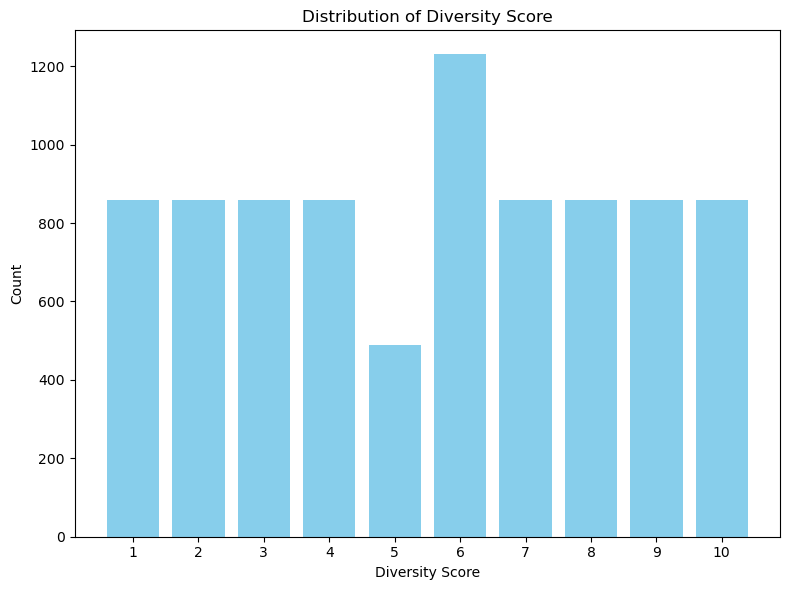

In [54]:
value_counts_rank = merged_df['Mapped_Diversity_Score_1_to_10'].value_counts()
sort_value_counts_rank = value_counts_rank.sort_index()

# Bar plot for 'Affluence_rank' distribution
plt.figure(figsize=(8, 6))
plt.bar(sort_value_counts_rank.index, sort_value_counts_rank.values, color='skyblue')
plt.xlabel('Diversity Score')
plt.ylabel('Count')
plt.title('Distribution of Diversity Score')
plt.xticks(sort_value_counts_rank.index)
plt.tight_layout()
plt.show()

In [59]:
merged_df['diversity_score'] = merged_df['Mapped_Diversity_Score']

# Extracting 'diversity_score', 'suburb_name', and 'postcode' columns into a new DataFrame
diversity_score = merged_df[['diversity_score', 'suburb_name', 'Official Code Suburb', '_google_import_B']]

# Save extracted data to CSV format
merged_df.to_csv('diversity_score.csv', index=False)  # Set index=False to exclude index in the saved file
